In [63]:

import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

In [64]:
# Create a Quantum Circuit acting on a quantum register of four qubits (For half adder)
#The first parameter is Qubits, the second is classical bits.
#For the purposes of this half adder, I will require only 2 classical bits
circ = QuantumCircuit(4,2)

In [65]:
# this makes the first two qubits (0, 1), the normal state of a qubit is (0) 
# and the two lines flip it using the x (not) operation
circ.x(0) 
circ.x(1)

In [66]:
#now I will use the C-NOT or Controlled Not (Classical:XOR) to get the sum of the half adder. 
#the CNOT works by using a control qubit and a target one, it performs the XOR (Technically the NOT) on the target.
circ.cx(0,2)
circ.cx(1,2)
#Our sum is now finished, we need to find the carry.

In [67]:
#Now we will use the Toffoli gate (Classical:AND) to get the carry of the Half-Adder
#The Toffoli gate works by having two control qubits and one target qubit, when both the control qubits are of value 1
#It performs a NOT (x) operation on the target, which means it turns it to a value of 1.
circ.ccx(0,1,3)
#Now qubit3 has the carry value (AND) and qubit2 has the sum value (XOR)

In [68]:
#But for fun, let's visualize our Half Adder circuit.
circ.draw()

┌───┐               
q_0: ┤ X ├──■─────────■──
     ├───┤  │         │  
q_1: ┤ X ├──┼────■────■──
     └───┘┌─┴─┐┌─┴─┐  │  
q_2: ─────┤ X ├┤ X ├──┼──
          └───┘└───┘┌─┴─┐
q_3: ───────────────┤ X ├
                    └───┘
c: 2/════════════════════

In [69]:
#Now let's measure the values of our Qubits!
#I will measure for now, qubit2 and qubit3
circ.measure(2,0)
circ.measure(3,1)


In [70]:
#Now for fun again let's see our qubits being measured on drawing!
circ.draw()

┌───┐                     
q_0: ┤ X ├──■─────────■────────
     ├───┤  │         │        
q_1: ┤ X ├──┼────■────■────────
     └───┘┌─┴─┐┌─┴─┐  │  ┌─┐   
q_2: ─────┤ X ├┤ X ├──┼──┤M├───
          └───┘└───┘┌─┴─┐└╥┘┌─┐
q_3: ───────────────┤ X ├─╫─┤M├
                    └───┘ ║ └╥┘
c: 2/═════════════════════╩══╩═
                          0  1

In [71]:
#lets check the value of the qubits using a simulator!
from qiskit import transpile 
from qiskit import IBMQ
IBMQ.save_account('XXXXXX')
# Use AerSimulator
from qiskit import Aer
 

configrc.store_credentials:WARNING:2023-10-17 20:09:50,243: Credentials already present. Set overwrite=True to overwrite.


In [72]:
IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers
from qiskit_ibm_runtime import QiskitRuntimeService


ibmqfactory.load_account:WARNING:2023-10-17 20:09:51,358: Credentials are already in use. The existing account in the session will be replaced.


In [73]:
# Initialize the account first.
service = QiskitRuntimeService()

service.backends()

[<IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibm_brisbane')>]

In [74]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

ActualQuantumComputer = provider.get_backend('ibm_lagos') 
transpiled_circuit= transpile(circ, ActualQuantumComputer)
transpiled_circuit.draw()


global phase: 5π/8
               ┌─────────┐┌────┐┌─────────┐     ┌───┐                      »
      q_3 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■──┤ X ├──■───────────────────»
               └─────────┘├───┬┘└──┬───┬──┘┌─┴─┐└─┬─┘┌─┴─┐┌───┐┌──────────┐»
      q_2 -> 1 ───────────┤ X ├────┤ X ├───┤ X ├──■──┤ X ├┤ X ├┤ Rz(-π/4) ├»
                  ┌───┐   └─┬─┘    └─┬─┘   └───┘     └───┘└─┬─┘└──────────┘»
      q_0 -> 2 ───┤ X ├─────■────────┼──────────────────────┼──────────────»
                  ├───┤              │                      │              »
      q_1 -> 3 ───┤ X ├──────────────■──────────────────────■──────────────»
                  └───┘                                                    »
ancilla_0 -> 4 ────────────────────────────────────────────────────────────»
                                                                           »
ancilla_1 -> 5 ────────────────────────────────────────────────────────────»
                                                                           »
ancilla_2 -> 6 ────────────────────────────────────────────────────────────»
                                                                           »
          c: 2/════════════════════════════════════════════════════════════»
                                                                           »
«                                                                       »
«      q_3 -> 0 ────────────────────────────────────────────────────────»
«               ┌───┐┌─────────┐┌───┐┌──────────┐┌───┐┌──────────┐┌────┐»
«      q_2 -> 1 ┤ X ├┤ Rz(π/4) ├┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(3π/4) ├┤ √X ├»
«               └─┬─┘└─────────┘└─┬─┘└──────────┘└─┬─┘└──────────┘└────┘»
«      q_0 -> 2 ──■───────────────┼────────────────■────────────────────»
«                                 │  ┌─────────┐                        »
«      q_1 -> 3 ──────────────────■──┤ Rz(π/4) ├────────────────────────»
«                                    └─────────┘                        »
«ancilla_0 -> 4 ────────────────────────────────────────────────────────»
«                                                                       »
«ancilla_1 -> 5 ────────────────────────────────────────────────────────»
«                                                                       »
«ancilla_2 -> 6 ────────────────────────────────────────────────────────»
«                                                                       »
«          c: 2/════════════════════════════════════════════════════════»
«                                                                       »
«                                                                ░ ┌─┐   
«      q_3 -> 0 ─────────────────────────────────────────────────░─┤M├───
«               ┌─────────┐┌───┐     ┌───┐┌───┐┌──────────┐┌───┐ ░ └╥┘   
«      q_2 -> 1 ┤ Rz(π/2) ├┤ X ├──■──┤ X ├┤ X ├┤ Rz(-π/4) ├┤ X ├─░──╫────
«               └─────────┘└─┬─┘  │  └─┬─┘└─┬─┘├─────────┬┘└─┬─┘ ░  ║    
«      q_0 -> 2 ─────────────┼────┼────┼────■──┤ Rz(π/4) ├───■───░──╫────
«                            │  ┌─┴─┐  │       └─────────┘       ░  ║ ┌─┐
«      q_1 -> 3 ─────────────■──┤ X ├──■─────────────────────────░──╫─┤M├
«                               └───┘                            ░  ║ └╥┘
«ancilla_0 -> 4 ────────────────────────────────────────────────────╫──╫─
«                                                                   ║  ║ 
«ancilla_1 -> 5 ────────────────────────────────────────────────────╫──╫─
«                                                                   ║  ║ 
«ancilla_2 -> 6 ────────────────────────────────────────────────────╫──╫─
«                                                                   ║  ║ 
«          c: 2/════════════════════════════════════════════════════╩══╩═
«                                                                   0  1

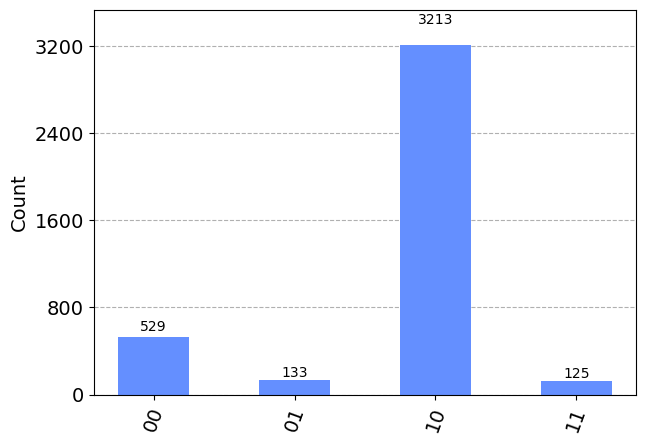

In [75]:
result = ActualQuantumComputer.run(transpiled_circuit).result()
counts = result.get_counts()
plot_histogram(counts)